# 1 answer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('/content/dataset.csv')  # Replace with the actual dataset file path

X = data.drop('target', axis=1)
y = data['target']

label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['cp'] = label_encoder.fit_transform(X['cp'])

scaler = StandardScaler()
X[['age', 'restecg', 'trestbps', 'exang']] = scaler.fit_transform(
    X[['age', 'restecg', 'trestbps', 'exang']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8360655737704918
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# 2 answer


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/dataset.csv')

data = data.dropna()

data = pd.get_dummies(data, columns=['cp'])

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8241758241758241
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



# 3 answer



In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

data = pd.read_csv('/content/dataset.csv')

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(y_test, y_pred))


Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#4. answer


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('/content/dataset.csv')

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375


# 5 answer

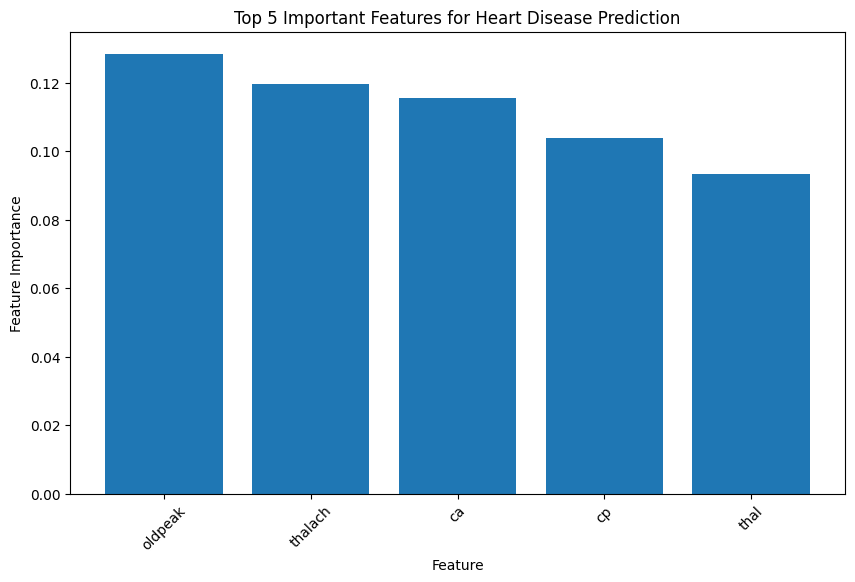

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/dataset.csv')
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
feature_importances = rf_classifier.feature_importances_
top5_indices = np.argsort(feature_importances)[-5:][::-1]  # Get the indices of the top 5 features
top5_features = X.columns[top5_indices]  # Get the corresponding feature names
plt.figure(figsize=(10, 6))
plt.bar(range(len(top5_features)), feature_importances[top5_indices], align='center')
plt.xticks(range(len(top5_features)), top5_features, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.show()


# 6 answer



In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/dataset.csv')

X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.8524590163934426


# 7 answer

1. Data Preparation: First, load and preprocess your dataset. This includes handling missing values, encoding categorical variables (if any), and splitting the data into training and testing sets.

2. Default Model: Train a default Random Forest Classifier on the training data to establish a baseline performance.

3. Hyperparameter Tuning: Use a hyperparameter tuning method (e.g., GridSearchCV or RandomizedSearchCV) to search for the best set of hyperparameters. This step helps optimize the model's performance.

4. Evaluate Model Performance: Evaluate both the default and tuned models using appropriate performance metrics (e.g., accuracy, precision, recall, F1-score, ROC AUC) on the test data.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv('/content/dataset.csv')

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

default_rf = RandomForestClassifier(random_state=42)
default_rf.fit(X_train, y_train)
default_predictions = default_rf.predict(X_test)

print("Default Random Forest Classifier Performance:")
print(classification_report(y_test, default_predictions))

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

tuned_rf = grid_search.best_estimator_
tuned_predictions = tuned_rf.predict(X_test)

print("\nTuned Random Forest Classifier Performance:")
print(classification_report(y_test, tuned_predictions))


# 8 answer

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('/content/dataset.csv')
data.dropna(inplace=True)

data = pd.get_dummies(data, columns=['cp'])

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature1 = 'age'
feature2 = 'exang'

X_subset = X_train[[feature1, feature2]]
y_subset = y_train

x_min, x_max = X_subset[feature1].min() - 1, X_subset[feature1].max() + 1
y_min, y_max = X_subset[feature2].min() - 1, X_subset[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

plt.scatter(X_subset[feature1], X_subset[feature2], c=y_subset, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()
